# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover: 
0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problem
3. Fit the model/algorithm/estimator and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

In [10]:
import numpy as np

## 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create Y (labels -results-)
y = heart_disease["target"]

In [5]:
# 2. Choose the right model and hyperparameters (to tune the model)
from sklearn.ensemble import RandomForestClassifier #classifier model, get data and pattern and classify sample
clf = RandomForestClassifier() # instanciate the class

# Keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
clf.fit(X_train, y_train);

In [11]:
# Make a prediction
y_label = clf.predict(np.array([1, 2, 3, 4])) #cannot make prediction, because shape is different from the shape the model has been trained with

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [12]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [13]:
y_test

69     1
103    1
105    1
151    1
83     1
      ..
198    0
80     1
192    0
285    0
21     1
Name: target, Length: 61, dtype: int64

In [14]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [15]:
clf.score(X_test, y_test)

0.7540983606557377

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.74      0.85      0.79        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [20]:
confusion_matrix(y_test, y_preds)

array([[18, 10],
       [ 5, 28]])

In [21]:
accuracy_score(y_test, y_preds)

0.7540983606557377

In [28]:
# 5. Improce a model
# Try a different amount of n_estimator
np.random.seed(42)
for i in range (10, 100, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%')
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 70.49%

Trying model with 20 estimators...
Model accuracy on test set: 85.25%

Trying model with 30 estimators...
Model accuracy on test set: 83.61%

Trying model with 40 estimators...
Model accuracy on test set: 78.69%

Trying model with 50 estimators...
Model accuracy on test set: 78.69%

Trying model with 60 estimators...
Model accuracy on test set: 80.33%

Trying model with 70 estimators...
Model accuracy on test set: 78.69%

Trying model with 80 estimators...
Model accuracy on test set: 81.97%

Trying model with 90 estimators...
Model accuracy on test set: 80.33%



In [30]:
# 6. Save model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [33]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8032786885245902

# Machine learning process

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data ready to be used with machine learning 

Three main things we have to do: 
    1. Split the data into features and labels (usually `X` & `y`) 
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)
    
    4. Split into test and train

In [35]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [37]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [38]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((303, 13), (303,), (242, 13), (61, 13), (242,), (61,))

## 1.1. Make sure it's all numerical

In [42]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [43]:
len(car_sales)

1000

In [44]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [46]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

In [47]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor() # Create model
model.fit(X_train, y_train) # Train
model.score(X_test, y_test) # Test

ValueError: could not convert string to float: 'Toyota'

In [48]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [49]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [54]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                one_hot, 
                                categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(X) 
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [56]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [57]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [59]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y, 
                                                    test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
model.score(X_test, y_test)

0.3235867221569877

## 1.2 What if there were missing values? 

1. Fill them with some value (also know as imputation)
2. Remove the samples with missing data altogether

In [61]:
# Import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [62]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [63]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [66]:
# Let's try and convert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough")
transformed_X = transformer.fit_transform(X)

ValueError: Input contains NaN

In [67]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing data with Pandas

In [68]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [73]:
# Fill the "Make" column: categorical with 'missing'
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column: categorical with 'missing'
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column: numberical with average
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column: use majority
car_sales_missing["Doors"].fillna(4, inplace=True)

In [74]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [75]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [77]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [78]:
len(car_sales_missing)

950

In [79]:
# Split data into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [82]:
# Transform the data into numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one-hot", 
                                  one_hot, 
                                  categorical_features)], 
                                remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [84]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [85]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### A: eliminate rows with missing Price values

In [86]:
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [87]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

#### B: split into X & y

In [88]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [89]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

#### C: fill missing values with Scikit-Learn

In [93]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy = "mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features), #name of the imputer, for future use
    ("door_imputer", door_imputer, door_feature), 
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X


array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [94]:
car_sales_filled = pd.DataFrame(filled_X, 
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])

In [95]:
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [96]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [100]:
# Convert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], 
                               remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [103]:
# Now we've got our data filled (not missing values) adn as numbers
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y, 
                                                    test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [104]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choosing the right estimator/algorythm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm

Type of problems:
* Classification: predicting whether a sample is one thing or another
* Regression: predicting a number

Step 1 - Check the Scikit-Learn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

In [37]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [38]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
# How many samples? 
len(boston_df)

506

In [115]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                   test_size=0.2)

# Intantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge moel on test data
model.score(X_test, y_test)

0.6662221670168521

How do we improve this score? 


What if Ridge wasn't working?

##### Refer back to the map

In [116]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.873969014117403

In [118]:
# Check the Ridge model again
model.score (X_test, y_test)

0.6662221670168521

### 2.2 Choosing an estimator for a classification problem

Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [119]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [121]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [125]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Check the LinearSVC
clf.score(X_test, y_test)

/Users/paolaarzuffi/Documents/WD/ML_DS/sample_project/end/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.47540983606557374

In [126]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [127]:
# Use Random Forest Classifier to improve model
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instanciate RFC
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Evaluate RFC
rfc.score(X_test, y_test)


0.8524590163934426

Tidbit: 
    1. If you have structured data, use ensemble methods (tables)
    2. If you have unstructured data, use deep learning or transfer learning (images, audios)

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* X = features, features variables, data
* y = labels, targets, target variables

In [152]:
# Use Random Forest Classifier to improve model
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanciate RFC
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate RFC (use the patters the model has learned)
clf.score(X_test, y_test)


0.8524590163934426

In [143]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [144]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions: 
1. `predict()`
2. `predict_proba()`

In [145]:
# Use a trained model to make predictions

clf.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work

ValueError: Expected 2D array, got 1D array instead:
array=[1 7 8 3 4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [146]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [153]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [154]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [155]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [156]:
clf.score(X_test, y_test)

0.8524590163934426

In [158]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

#### Make predictions with `predict_proba()`


In [160]:
# predict_proba() returns probabilities of a classification label (heart disease, no heart disease)
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [161]:
# Let's predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [162]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [163]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


`predict()` can also be used for regression models

In [170]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [172]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [173]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [175]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds) #prediction is on average 2.1 away from the targegt

2.1226372549019623

## 4. Evaluating a machine learning model

Metrics and scoring

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with the `score` method

* Classification: Return the mean accuracy on the given test data and labels
* Regression: Return the coefficient of determination R^2 of the prediction

In [177]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier().fit(X_train, y_train)

In [180]:
clf.score(X_train, y_train)

1.0

In [179]:
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same, but for regression

In [182]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model
model = RandomForestRegressor().fit(X_train, y_train)


In [183]:
model.score(X_test, y_test)

0.873969014117403

### 4.2 Evaluating the model using the `scoring` parameter

In [185]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier().fit(X_train, y_train);

In [186]:
clf.score(X_test, y_test)

0.8524590163934426

In [189]:
# Evaluate a score by cross validation
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.90163934, 0.80327869, 0.81666667, 0.75      ])

In [190]:
# Evaluate a score by cross validation
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.83870968, 0.83870968, 0.9       , 0.83333333,
       0.86666667, 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [191]:
np.random.seed(42)
# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [192]:
# Default scoring parameter of classifier = mean accuracy 
clf.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [193]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**1. Accuracy**

In [3]:
heart_disease = pd.read_csv("heart-disease.csv")
len(heart_disease)

303

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5) # mean accuracy


In [5]:
np.mean(cross_val_score)

0.8248087431693989

In [6]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%')

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**2. Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [11]:
len(X_test)

61

In [12]:
# Interested in probability of predicting 1
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [13]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

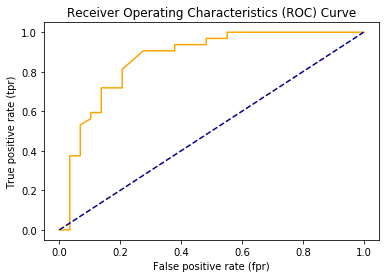

In [14]:
# Create a function for plotting a ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and the true positive rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customise the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.show()
    
plot_roc_curve(fpr, tpr);

In [15]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

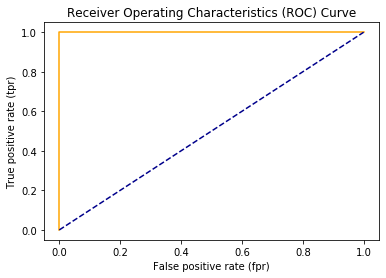

In [16]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [17]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**3. Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused.

In [18]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [19]:
# Visualise confusioni matrix with pd.crosstab()
pd.crosstab(y_test, 
           y_preds, 
           rownames=["Actual Labels"], 
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [20]:
## Installing a conda package from Jupyter Notebook into the current environment
import sys
!conda install --yes --prefix {sys.prefix} seaborn

/Users/paolaarzuffi/opt/anaconda3/bin/conda: line 3: import: command not found
/Users/paolaarzuffi/opt/anaconda3/bin/conda: line 6: syntax error near unexpected token `sys.argv'
/Users/paolaarzuffi/opt/anaconda3/bin/conda: line 6: `if len(sys.argv) > 1 and sys.argv[1].startswith('shell.') and sys.path and sys.path[0] == '':'


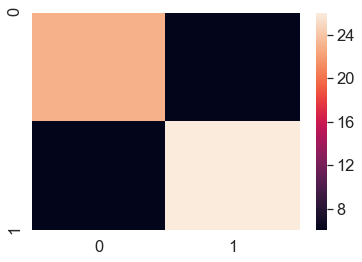

In [21]:
# Make our confusion matrix more visual with Seaborn heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

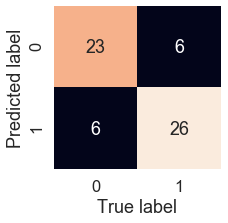

In [27]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat, 
                    annot=True, # Annotate the boxes with conf_mat
                    cbar=False);
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # Fix the broken annotation (this happened in Matplolib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);

plot_conf_mat(conf_mat)    
    

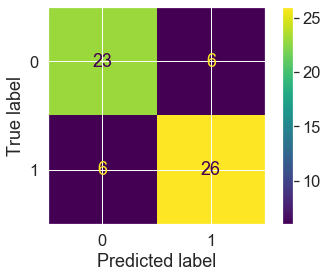

In [31]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, values_format='.4g')
plt.show()

**4. Classification Report**

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [34]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, 
                                  disease_preds,
                                  output_dict=True))

/Users/paolaarzuffi/Documents/WD/ML_DS/sample_project/end/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarise classification metrics: 

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples with are labelled with 0 or 1)
* **Precision** and **recall** become more important when classes are imbalanced
    * If false positive predictions are worse than false negative, aim for higher precision
    * If false negative predictions are worse than false positive, aim for higher recall
* **F1-score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - modules/model_evaluation.html

1. R^2 (r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model prefectly predicts a range of numbers, its R^2 value would be 1. 

In [42]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train);


In [43]:
model.score(X_test, y_test)

0.873969014117403

In [47]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [48]:
y_test.mean()

21.488235294117644

In [52]:
y_test_mean[:5]

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529])

In [53]:
r2_score(y_test, y_test_mean)

0.0

In [54]:
r2_score(y_test, y_test)

1.0

**Mean absolute errror (MAE)**

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your model predictions are. 

In [55]:
# Mean absolute error

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [68]:
df = pd.DataFrame(data={"actual values": y_test, 
                      "predicted values": y_preds})
df.head()

,actual values,predicted values
173,23.6,23.002
274,32.4,30.826
491,13.6,16.734
72,22.8,23.467
452,16.1,16.853


In [69]:
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


**Mean squared error (MSE)**

In [71]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

In [75]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

9.242328990196082

**Objective**
* Minimise MAE, MSE
* Maximise R^2

## Machine Learning Model Evaluation


Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

### Classification Model Evaluation Metrics/Techniques

* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

*The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.*

* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

* [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

* [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

* [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.

* [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) - Also known as [receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false-positive rate.

* [**Area Under Curve (AUC) Score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

#### Which classification metric should you use?

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

* **Precision** and **recall** become more important when classes are imbalanced.

 * If false-positive predictions are worse than false-negatives, aim for higher precision.

 * If false-negative predictions are worse than false-positives, aim for higher recall.

* **F1-score** is a combination of precision and recall.

* A confusion matrix is always a good way to visualize how a classification model is going.

### Regression Model Evaluation Metrics/Techniques

* [**R^2 (r-squared) or the coefficient of determination**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers its R^2 value would be 1.

* [**Mean absolute error (MAE)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

* [**Mean squared error (MSE)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

#### Which regression metric should you use?

* **R2** is similar to accuraty. It gives a quick indication of how well your model might be doing. Generally the closer your **R2** value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is. 
* **MAE** givers a better indication of how far off each of your model's predicitons are on average. 
* As for **MAE** or **MSE**, because the way MSE is calculate, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we are predicting the values of houses (which we are). 
 * Pay more attention to MAE: when being £10,000 off is ***twice*** as bad as being £5,000 off. 
  * Pay more attention to MSE: when being £10,000 off is ***more than twice*** as bad as being £5,000 off.

For more resources on evaluating a machine learning model, be sure to check out the following resources:

* [Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)](https://scikit-learn.org/stable/modules/model_evaluation.html)

* [Beyond Accuracy: Precision and Recall by Will Koehrsen](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

* [Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python/37861832#37861832)

### 4.2.3 Finally using the `scoring` parameter

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [80]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [81]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [83]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [85]:
# Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision.mean()

0.8209201193072161

In [87]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall.mean()

0.8727272727272727

In [88]:
# F1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1.mean()

0.8256946143361409

In [89]:
np.mean(cv_f1)

0.8256946143361409

How about our regression model?

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [93]:
model.score() ## default scoring coefficient of determination R^2

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [100]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.622375083951403

In [98]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [104]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.03943137, -2.56209901, -3.36807921, -3.82946535, -3.2339901 ])

In [105]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([ -8.30964437, -12.73640845, -20.79058856, -46.53944422,
       -19.15980137])

In [106]:
np.mean(cv_mse)

-21.507177393321676

### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds):.2f}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1: {f1_score(y_test, y_preds):.2f}')


Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.85
Recall: 0.875
F1: 0.86


**Regression evaluation functions**

In [122]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the regression model
print(f'Regression model metrics on the test set:')
print(f'r2 score: {r2_score(y_test, y_preds):.2f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_preds):.2f}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_preds):.2f}')

Model metrics on the test set:
r2 score: 0.87
Mean Absolute Error (MAE): 2.12
Mean Squared Error (MSE): 9.24


## 5. Improving a model

First predictions = baseline predictions
First model = baseline model

From a data perspective: 
   * Could we collect more data? (generally, the more data, the better)
   * Could we improve our data? 

From a model perspective: 
   * Is there a better model we could use? (see Scikit-Learn map, select a more complex one)
   * Could we improve the current model?




*Hyperparameters vs. Parameters*
    
**Parameters** = models finds this patterns in data

**Hyperparameters** = settings on a model you can adjust to (potentially) improve its ability to find patterns


Three ways to adjust hyperparameters: 
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [124]:
## Get model hyperparameters

# Import
from sklearn.ensemble import RandomForestClassifier

# Instantiate
clf = RandomForestClassifier()

# Call get_params()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets: training, validation and test.

In [125]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust: 

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_sample_split`
* `n_estimator`

In [137]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification
    """
    accuracy = accuracy_score(y_true, y_preds )
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2), 
                   "f1": round(f1, 2)}
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {precision:.2f}')
    print(f'F1 score: {f1:.2f}')
    
    return metric_dict

In [129]:
len(heart_disease_shuffled)

303

In [149]:
# Manually divide the data into train, validation, test
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of the data (212)
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data (45 + 212 = 257)
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier(n_estimators=10) # 10 to mimic the settings in the video
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on the validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 80.00%
Precision: 0.77
Recall: 0.77
F1 score: 0.84


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [144]:
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [145]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [148]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the second classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [150]:
# Create a third classifier with different max_depth
clf_3 = RandomForestClassifier(n_estimators=100,
                               max_depth=10)
clf_3.fit(X_train, y_train)

# Make predictions 
y_preds_3 = clf_3.predict(X_valid)

# Evaluate the third classifier
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Accuracy: 82.22%
Precision: 0.81
Recall: 0.81
F1 score: 0.85


### 5.1 Hyperparameter tuning with RandomizedSearchCV

In [153]:
from sklearn.model_selection import RandomizedSearchCV

# Create a dictionary with keys=parameters to adjust, values=values to try

grid = {"n_estimators": [10, 200, 500, 1000, 1200], 
        "max_depth": [None, 5, 10, 20, 30], 
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6], 
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split inton train and test sets
# No validation, as it uses cross validation, and automatically create the validation sets
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) #How much of computer processor is dedicate to ml job (-1=all)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, # pass classifier
                            param_distributions=grid, # pass parameters
                            n_iter=10, # number of models (combinations) to try
                            cv=5, # cross validation
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=10, min_samples_split=4, min_sampl

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.7s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.6s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [154]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5}

In [161]:
len(X_train), len(x_test), len(y_train), len(y_test)

(242, 61, 242, 61)

In [159]:
len(rs_y_preds)

46

In [162]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.76
Recall: 0.76
F1 score: 0.82


If no improvement, increase the number of models

### 5.3 Hyperparameters tuning with GridSearchCV

Goes through every possible combinations

In [163]:
grid

{'n_estimators': [10, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [164]:
6*5*2*3*3*5

2700

In [165]:
# Reducing the hyperparameters to reduce the number of combinations
# From best param of step before
grid_2 = {'n_estimators': [10, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]}

In [166]:
3*1*2*1*2*5

60

In [179]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split inton train and test sets
# No validation, as it uses cross validation, and automatically create the validation sets
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Instantiate RandomForestClassifier
# clf = RandomForestClassifier(n_jobs=1) #How much of computer processor is dedicate to ml job (-1=all)

# # Setup GridSearchCV
# gs_clf = GridSearchCV(estimator=clf, # pass classifier
#                       param_grid=grid_2, # pass parameters
#                       cv=5, # cross validation
#                       verbose=2)

# # Fit the GridSearchCV version of clf
# rs_clf.fit(X_train, y_train)

In [170]:
rs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 10}

In [171]:
# Making predictions 
gs_y_preds = rs_clf.predict(x_test)

# Evaluate the predictions 
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 80.33%
Precision: 0.77
Recall: 0.77
F1 score: 0.79


#### Worflow for hyperparameters adjustments
1. Adjust some parameters by hand
2. Try tuning with RandomisedSearchCV increasing n_iter and making grid from step 1
3. Create grid from best_params_ from step 2 and use GridSearchCV

### Comparison

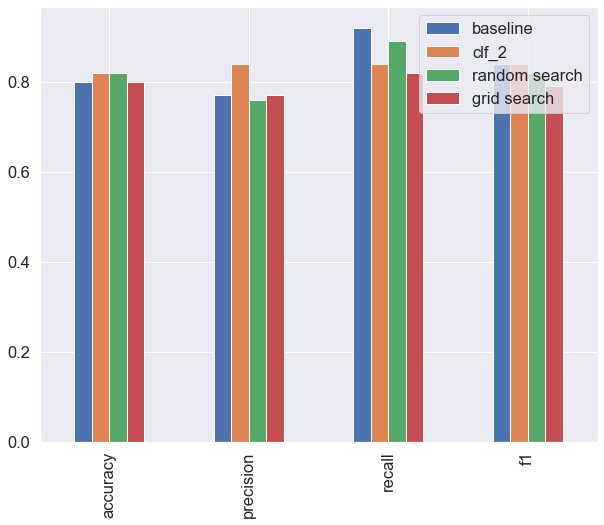

In [172]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics, 
                                "clf_2": clf_2_metrics, 
                                "random search": rs_metrics, 
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

Choose model that optimise the wanted parameter

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models: 
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**


Python pickle module is used for serializing and de-serializing a Python object structure. ... Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [175]:
import pickle

# Save an existing model to file
pickle.dump(rs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [176]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [181]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 80.33%
Precision: 0.77
Recall: 0.77
F1 score: 0.79


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.82, 'f1': 0.79}

**Joblib**

In [182]:
from joblib import dump, load

# Save the model to file
dump(rs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [187]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [188]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 80.33%
Precision: 0.77
Recall: 0.77
F1 score: 0.79


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.82, 'f1': 0.79}

***Which one to use***

In the specific case of scikit-learn, it may be better to use joblib’s replacement of pickle (`dump` & `load`), which is more efficient on objects that carry large numpy arrays (pattern in numbers) internally as is often the case for fitted scikit-learn estimators, but can only pickle to the disk and not to a string

*If model is large, **joblib** is more efficient*

## 7. Putting all together!

* All data should be numerical
* The should be no missing values
* Manipulate the test set the same as the training set
* Never test on data you've trained one
* Tune hyperparameters on validation set OR use cross-validation
* One best performance metric doesn't mean the best model

In [191]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [193]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [194]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell): 
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [202]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer #fill missing data
from sklearn.preprocessing import OneHotEncoder #convert data to numbers

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels (no price)
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")), 
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])
numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Set up the pre-processing step (filling missing value, than convert to numbers)

preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature), 
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor), 
                        ("model", RandomForestRegressor(n_estimators=10))])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.1821575815702311

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [207]:
# Use GridSearchCV with our regression Pipeline

from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000], 
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   2.6s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.6s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.6s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [208]:
gs_model.score(X_test, y_test)

0.3337859800130589